In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("pollution/pollutionData179228.csv")
data["date"] = data["timestamp"].apply(lambda x: list(x.split(" "))[0])
data["time"] = data["timestamp"].apply(lambda x: list(x.split(" "))[1])
data

,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude,timestamp,date,time
0,81,42,54,82,70,10.192906,56.181353,2014-08-01 00:05:00,2014-08-01,00:05:00
1,85,39,51,86,70,10.192906,56.181353,2014-08-01 00:10:00,2014-08-01,00:10:00
2,88,39,46,87,69,10.192906,56.181353,2014-08-01 00:15:00,2014-08-01,00:15:00
3,87,35,51,83,65,10.192906,56.181353,2014-08-01 00:20:00,2014-08-01,00:20:00
4,88,38,51,83,62,10.192906,56.181353,2014-08-01 00:25:00,2014-08-01,00:25:00
...,...,...,...,...,...,...,...,...,...,...
17563,207,74,61,128,71,10.192906,56.181353,2014-09-30 23:40:00,2014-09-30,23:40:00
17564,210,72,62,127,70,10.192906,56.181353,2014-09-30 23:45:00,2014-09-30,23:45:00
17565,209,71,60,126,71,10.192906,56.181353,2014-09-30 23:50:00,2014-09-30,23:50:00
17566,214,67,64,125,75,10.192906,56.181353,2014-09-30 23:55:00,2014-09-30,23:55:00


In [32]:
result = data.drop(["longitude", "latitude"], axis=1)
result = result[result["date"] == "2014-08-01"]
result

,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,timestamp,date,time
0,81,42,54,82,70,2014-08-01 00:05:00,2014-08-01,00:05:00
1,85,39,51,86,70,2014-08-01 00:10:00,2014-08-01,00:10:00
2,88,39,46,87,69,2014-08-01 00:15:00,2014-08-01,00:15:00
3,87,35,51,83,65,2014-08-01 00:20:00,2014-08-01,00:20:00
4,88,38,51,83,62,2014-08-01 00:25:00,2014-08-01,00:25:00
...,...,...,...,...,...,...,...,...
282,133,23,96,49,65,2014-08-01 23:35:00,2014-08-01,23:35:00
283,128,19,91,50,60,2014-08-01 23:40:00,2014-08-01,23:40:00
284,130,24,89,45,61,2014-08-01 23:45:00,2014-08-01,23:45:00
285,128,23,86,46,57,2014-08-01 23:50:00,2014-08-01,23:50:00


In [52]:
df = result.iloc[:,0:5]
df = df.set_index(result["time"])
df

,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide
time,,,,,
00:05:00,81,42,54,82,70
00:10:00,85,39,51,86,70
00:15:00,88,39,46,87,69
00:20:00,87,35,51,83,65
00:25:00,88,38,51,83,62
...,...,...,...,...,...
23:35:00,133,23,96,49,65
23:40:00,128,19,91,50,60
23:45:00,130,24,89,45,61


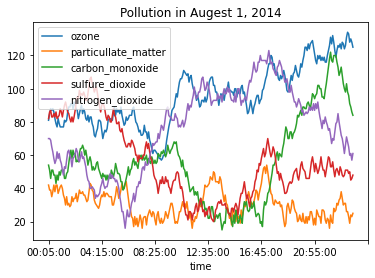

In [81]:
df.plot(title='Pollution in Augest 1, 2014');

In [63]:
df1 = df.loc["23:55:00",:]
df1

ozone                  125
particullate_matter     25
carbon_monoxide         84
sulfure_dioxide         48
nitrogen_dioxide        61
Name: 23:55:00, dtype: int64

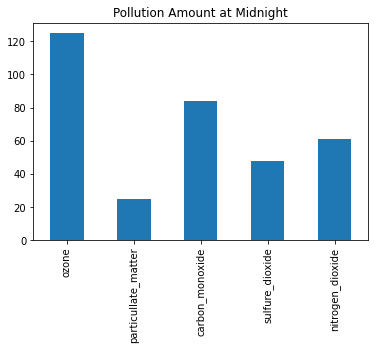

In [80]:
df1.plot(kind='bar', title='Pollution Amount at Midnight')
plt.show()

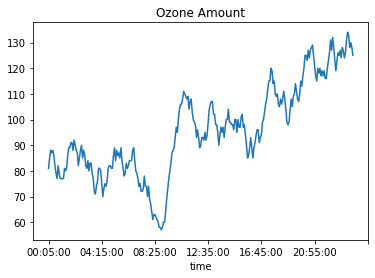

In [72]:
df2 = df.iloc[:,0]
df2.plot( title='Ozone Amount')
plt.show()

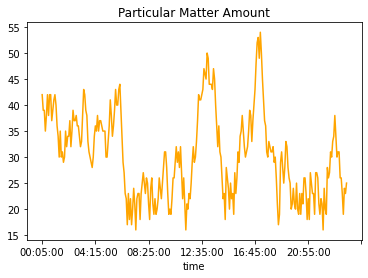

In [75]:
df3 = df.iloc[:,1]
df3.plot(color=['orange'], title='Particular Matter Amount')
plt.show()

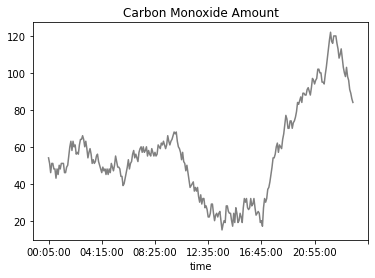

In [77]:
df4 = df.iloc[:,2]
df4.plot(color=['gray'], title='Carbon Monoxide Amount')
plt.show()

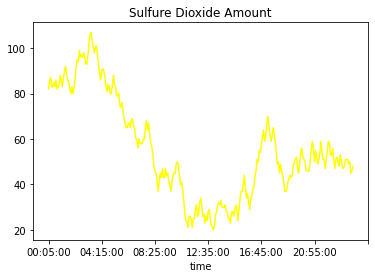

In [78]:
df5 = df.iloc[:,3]
df5.plot(color=['yellow'], title='Sulfure Dioxide Amount')
plt.show()

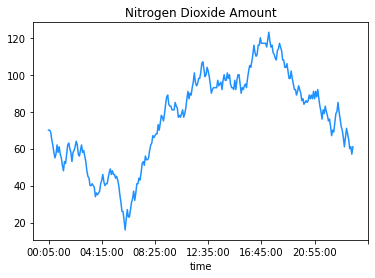

In [79]:
df6 = df.iloc[:,4]
df6.plot(color=['dodgerblue'], title='Nitrogen Dioxide Amount')
plt.show()

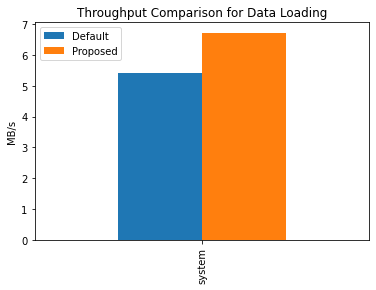

In [14]:
df7=pd.DataFrame({
    "Default":5.41,
    "Proposed":6.72
}, index=["system"])
p=df7.plot(kind='bar', title='Throughput Comparison for Data Loading')
p.set_ylabel("MB/s")
plt.show()

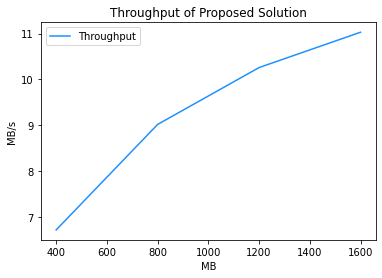

In [18]:
df7=pd.DataFrame({
    "Throughput":[6.72, 9.02, 10.26, 11.03]
}, index=[400,800,1200,1600])
p2=df7.plot(color=['dodgerblue'], title='Throughput of Proposed Solution')
p2.set_xlabel("MB")
p2.set_ylabel("MB/s")
plt.show()